In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 10

# Teil 1

## Aufgabe 1

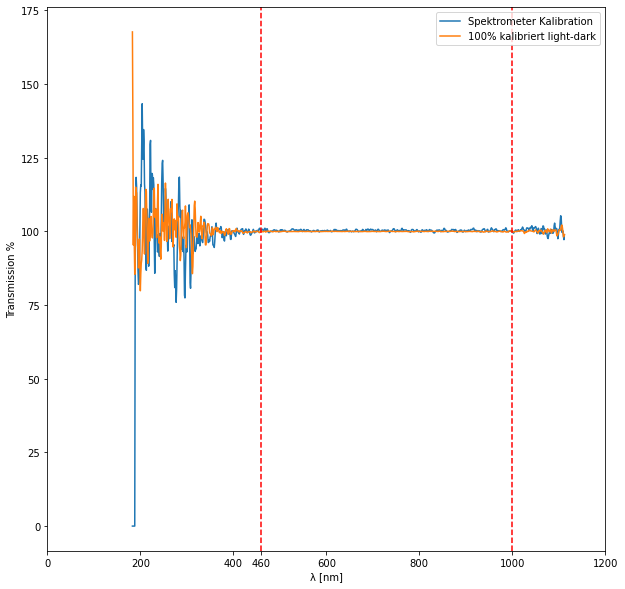

In [2]:
cal_trans = np.loadtxt("SpektrenHandout/TransmissionKalibrierung/CalibratedTransmission.TRM", skiprows=2, encoding='latin1')
light = np.loadtxt("SpektrenHandout/TransmissionKalibrierung/LightFrame.SSM", skiprows=2, encoding='latin1')
dark = np.loadtxt("SpektrenHandout/TransmissionKalibrierung/DarkFrame.SSM", skiprows=2, encoding='latin1')

plt.plot(cal_trans[:,0], cal_trans[:,1], label="Spektrometer Kalibration")

darksub = light[:,1] - dark[:,1]
calibrated = (light[:,1] - np.mean(dark[:,1])) / darksub *100
plt.plot(dark[:,0], calibrated, label="100% kalibriert light-dark")

plt.axvline(460, c="red", ls="--")
plt.axvline(1000, c="red", ls="--")
locs, labels = plt.xticks()
locs = np.append(locs, 460)
plt.xticks(locs, ["{:.0f}".format(x) for x in locs])
plt.ylabel("Transmission %")
plt.xlabel("\u03bb [nm]")
plt.legend()
plt.show()

## Aufgabe 2

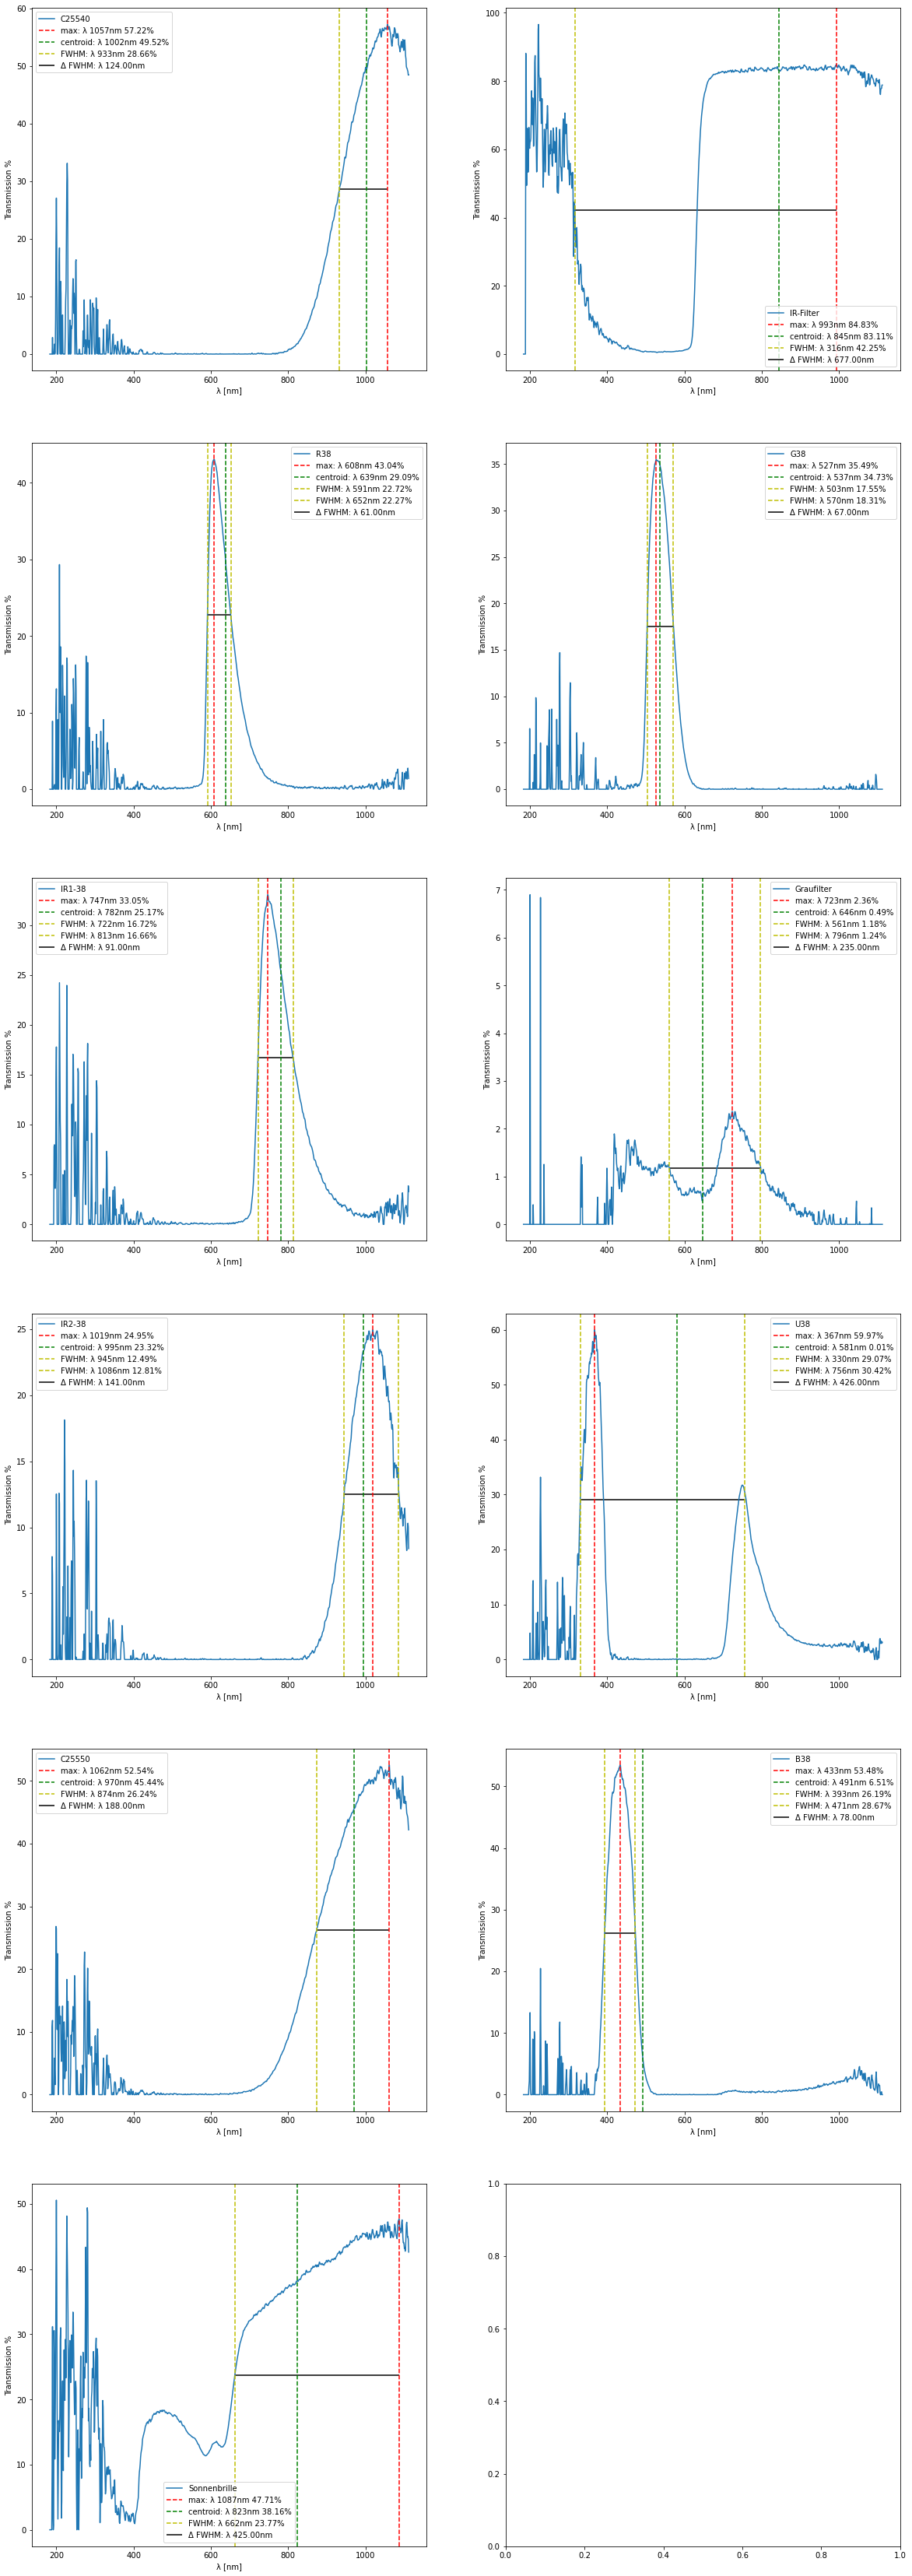

In [3]:
farbglasfilter=glob.glob("SpektrenHandout/Farbglasfilter/*.TRM")
rows = int(np.ceil(len(farbglasfilter)/2))
fig, ax = plt.subplots(nrows=rows, ncols=2)
fig.set_size_inches(10*2, rows*10)

for i, f in enumerate(farbglasfilter):
    spektrum = np.loadtxt(f, skiprows=2, encoding='latin1')
    # remove negative values
    spektrum[spektrum[:,1]<0,1] = 0
    ax[i%rows][i//rows].plot(spektrum[:,0], spektrum[:,1], label=f.split("/")[-1].split(".")[0])
    # remove area with lots of noise for upcoming calculations
    spektrum = spektrum[spektrum[:,0]>300,:]
    # calc max transmission
    maximum = spektrum[np.argmax(spektrum[:,1]),0]
    ax[i%rows][i//rows].axvline(maximum, c="red", ls="--", label="max: \u03bb {:.0f}nm {:.2f}%".format(maximum, np.max(spektrum[:,1])))
    # calc centroid
    centroid = np.argmin(np.abs(spektrum[:,0]-np.sum(spektrum[:,0]*spektrum[:,1])/np.sum(spektrum[:,1])))
    ax[i%rows][i//rows].axvline(spektrum[centroid, 0], c="g", ls="--", label="centroid: \u03bb {:.0f}nm {:.2f}%".format(spektrum[centroid, 0], spektrum[centroid, 1]))
    # calc FWHM
    max_val = np.max(spektrum[:,1])
    fwhm = None
    fwhm2 = None
    try:
        fwhm = np.argmin(np.abs(spektrum[spektrum[:,0]<maximum,1]-max_val/2))
        if spektrum[fwhm,1] < max_val*2/3:
            ax[i%rows][i//rows].axvline(spektrum[fwhm, 0], c="y", ls="--", label="FWHM: \u03bb {:.0f}nm {:.2f}%".format(spektrum[fwhm, 0], spektrum[fwhm, 1]))
        else:
            fwhm = None
    except:
        pass

    try:
        fwhm2 = np.argmin(np.abs(spektrum[spektrum[:,0]>maximum,1]-max_val/2)) + np.argmax(spektrum[:,1])
        if spektrum[fwhm2,1] < max_val*2/3:
            ax[i%rows][i//rows].axvline(spektrum[fwhm2, 0], c="y", ls="--", label="FWHM: \u03bb {:.0f}nm {:.2f}%".format(spektrum[fwhm2, 0], spektrum[fwhm2, 1]))
        else:
            fwhm2 = None
    except:
        pass

    if fwhm is None and fwhm2 is not None:
        ax[i%rows][i//rows].hlines(spektrum[fwhm2,1], maximum, spektrum[fwhm2,0], label="\u0394 FWHM: \u03bb {:.2f}nm".format(np.abs(maximum-spektrum[fwhm2,0])))
    elif fwhm is not None and fwhm2 is None:
        ax[i%rows][i//rows].hlines(spektrum[fwhm,1], spektrum[fwhm,0], maximum, label="\u0394 FWHM: \u03bb {:.2f}nm".format(np.abs(maximum-spektrum[fwhm,0])))
    elif fwhm is None and fwhm2 is None:
        raise NotImplementedError
    else:
        ax[i%rows][i//rows].hlines(spektrum[fwhm,1], spektrum[fwhm,0], spektrum[fwhm2,0], label="\u0394 FWHM: \u03bb {:.2f}nm".format(np.abs(spektrum[fwhm,0]-spektrum[fwhm2,0])))
    
    ax[i%rows][i//rows].set_xlabel("\u03bb [nm]")
    ax[i%rows][i//rows].set_ylabel("Transmission %")
    ax[i%rows][i//rows].legend()

plt.show()

## Aufgabe 3

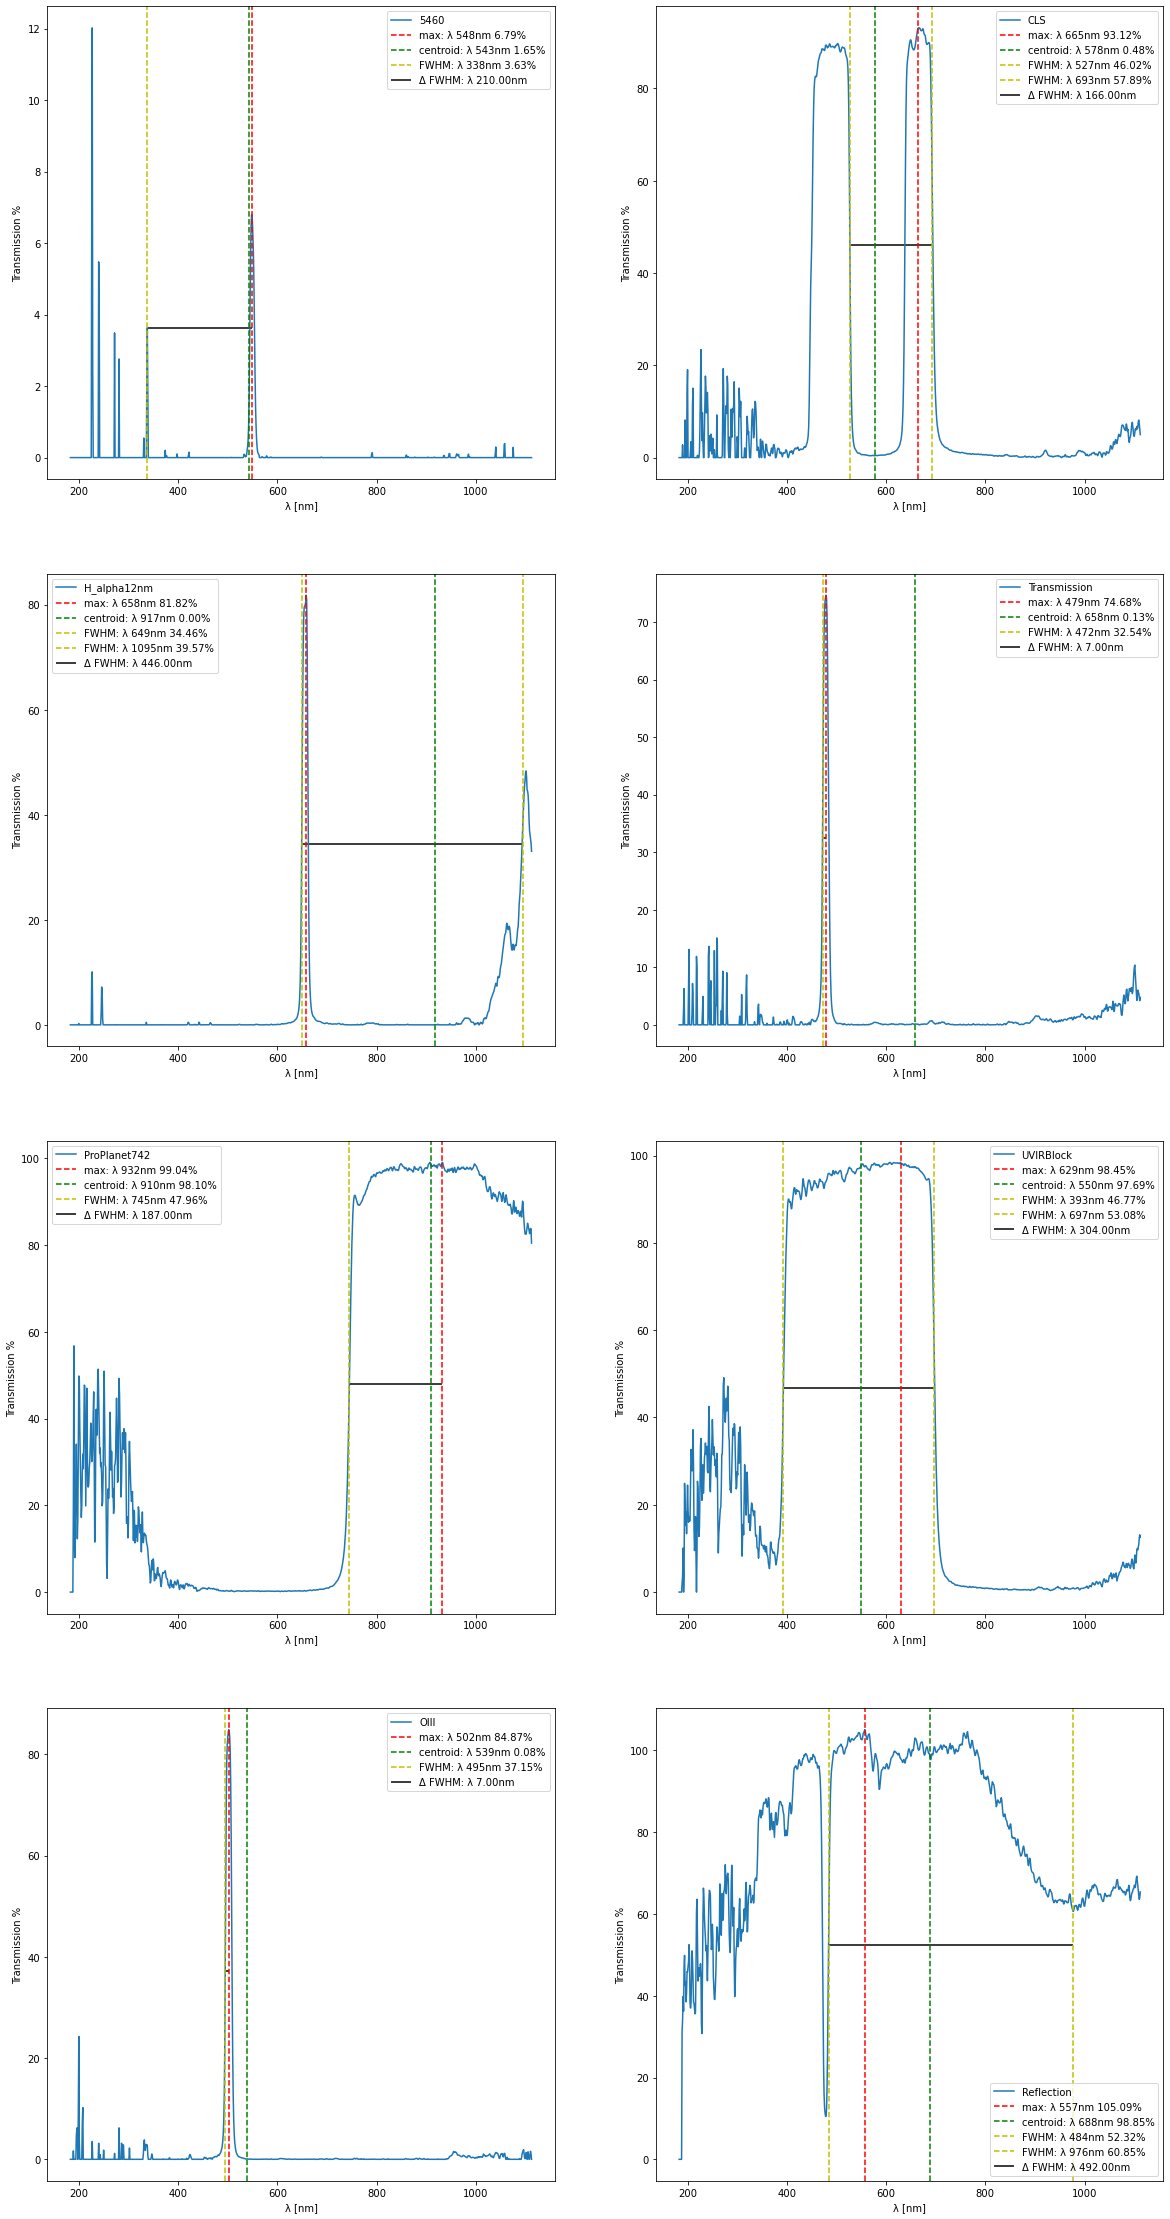

In [4]:
interferenzfilter=glob.glob("SpektrenHandout/Interferenzfilter/*.TRM")
rows = int(np.ceil(len(interferenzfilter)/2))
fig, ax = plt.subplots(nrows=rows, ncols=2)
fig.set_size_inches(10*2, rows*10)

for i, f in enumerate(interferenzfilter):
    spektrum = np.loadtxt(f, skiprows=2, encoding='latin1')
    # remove negative values
    spektrum[spektrum[:,1]<0,1] = 0
    ax[i%rows][i//rows].plot(spektrum[:,0], spektrum[:,1], label=f.split("/")[-1].split(".")[0])
    # remove area with lots of noise for upcoming calculations
    spektrum = spektrum[spektrum[:,0]>300,:]
    # calc max transmission
    maximum = spektrum[np.argmax(spektrum[:,1]),0]
    ax[i%rows][i//rows].axvline(maximum, c="red", ls="--", label="max: \u03bb {:.0f}nm {:.2f}%".format(maximum, np.max(spektrum[:,1])))
    # calc centroid
    centroid = np.argmin(np.abs(spektrum[:,0]-np.sum(spektrum[:,0]*spektrum[:,1])/np.sum(spektrum[:,1])))
    ax[i%rows][i//rows].axvline(spektrum[centroid, 0], c="g", ls="--", label="centroid: \u03bb {:.0f}nm {:.2f}%".format(spektrum[centroid, 0], spektrum[centroid, 1]))
    # calc FWHM
    max_val = np.max(spektrum[:,1])
    fwhm = None
    fwhm2 = None
    try:
        fwhm = np.argmin(np.abs(spektrum[spektrum[:,0]<maximum,1]-max_val/2))
        if spektrum[fwhm,1] < max_val*2/3:
            ax[i%rows][i//rows].axvline(spektrum[fwhm, 0], c="y", ls="--", label="FWHM: \u03bb {:.0f}nm {:.2f}%".format(spektrum[fwhm, 0], spektrum[fwhm, 1]))
        else:
            fwhm = None
    except:
        pass

    try:
        fwhm2 = np.argmin(np.abs(spektrum[spektrum[:,0]>maximum,1]-max_val/2)) + np.argmax(spektrum[:,1])
        if spektrum[fwhm2,1] < max_val*2/3:
            ax[i%rows][i//rows].axvline(spektrum[fwhm2, 0], c="y", ls="--", label="FWHM: \u03bb {:.0f}nm {:.2f}%".format(spektrum[fwhm2, 0], spektrum[fwhm2, 1]))
        else:
            fwhm2 = None
    except:
        pass

    if fwhm is None and fwhm2 is not None:
        ax[i%rows][i//rows].hlines(spektrum[fwhm2,1], maximum, spektrum[fwhm2,0], label="\u0394 FWHM: \u03bb {:.2f}nm".format(np.abs(maximum-spektrum[fwhm2,0])))
    elif fwhm is not None and fwhm2 is None:
        ax[i%rows][i//rows].hlines(spektrum[fwhm,1], spektrum[fwhm,0], maximum, label="\u0394 FWHM: \u03bb {:.2f}nm".format(np.abs(maximum-spektrum[fwhm,0])))
    elif fwhm is None and fwhm2 is None:
        raise NotImplementedError
    else:
        ax[i%rows][i//rows].hlines(spektrum[fwhm,1], spektrum[fwhm,0], spektrum[fwhm2,0], label="\u0394 FWHM: \u03bb {:.2f}nm".format(np.abs(spektrum[fwhm,0]-spektrum[fwhm2,0])))
    
    ax[i%rows][i//rows].set_xlabel("\u03bb [nm]")
    ax[i%rows][i//rows].set_ylabel("Transmission %")
    ax[i%rows][i//rows].legend()

plt.show()

## Aufgabe 4

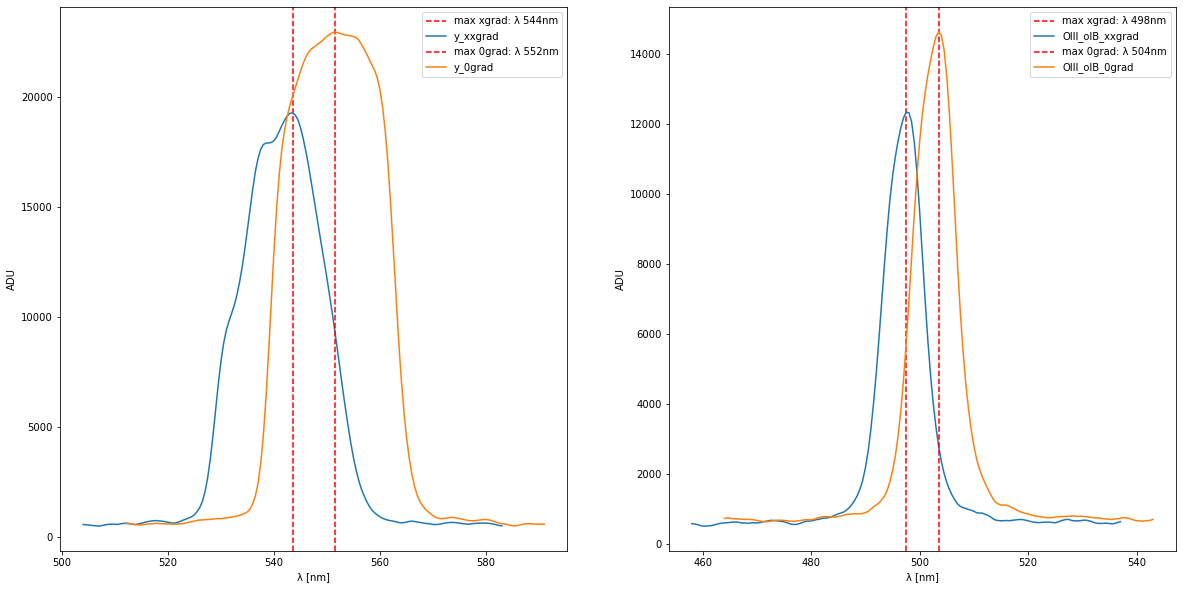

In [5]:
interferenzfilter=glob.glob("SpektrenHandout/KippungInterferenzfilter/*.ssm")

fig, ax = plt.subplots(ncols=2)
fig.set_size_inches(20, 10)
id_str = ["y_", "OIII"]

for f in interferenzfilter:
    spektrum = np.loadtxt(f, skiprows=2, encoding='latin1')
    for i, s in enumerate(id_str):
        if s in f:
            # calc max transmission
            maximum = spektrum[np.argmax(spektrum[spektrum[:,0]<600,1]),0]
            ax[i].axvline(maximum, c="red", ls="--", label="max {}: \u03bb {:.0f}nm".format(f[-9:-4], maximum))
            # only plot area around maximum
            spektrum = spektrum[spektrum[:,0]<maximum+40,:]
            spektrum = spektrum[spektrum[:,0]>maximum-40]
            ax[i].plot(spektrum[:,0], spektrum[:,1], label=f.split("/")[-1].split(".")[0])

            ax[i].set_xlabel("\u03bb [nm]")
            ax[i].set_ylabel("ADU")
            ax[i].legend()

plt.show()

# TEIL 2

## Aufgabe 1

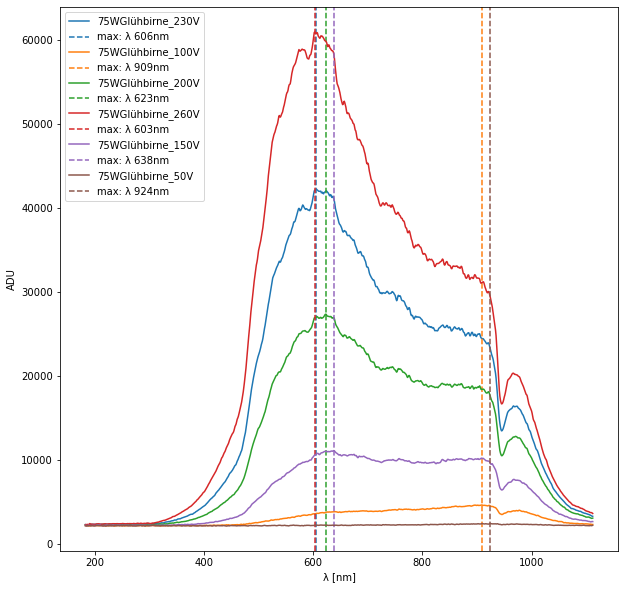

In [6]:
birnen=glob.glob("SpektrenHandout/Glühbirne/*.SSM")

fig, ax = plt.subplots()

for i, f in enumerate(birnen):
    spektrum = np.loadtxt(f, skiprows=2, encoding='latin1')
    p = ax.plot(spektrum[:,0], spektrum[:,1], label=f.split("/")[-1].split(".")[0])
    # calc max
    maximum = spektrum[np.argmax(spektrum[:,1]),0]
    ax.axvline(maximum, c=p[-1].get_c(), ls="--", label="max: \u03bb {:.0f}nm".format(maximum))

    ax.set_xlabel("\u03bb [nm]")
    ax.set_ylabel("ADU")
    ax.legend()

plt.show()

## Aufgabe 2

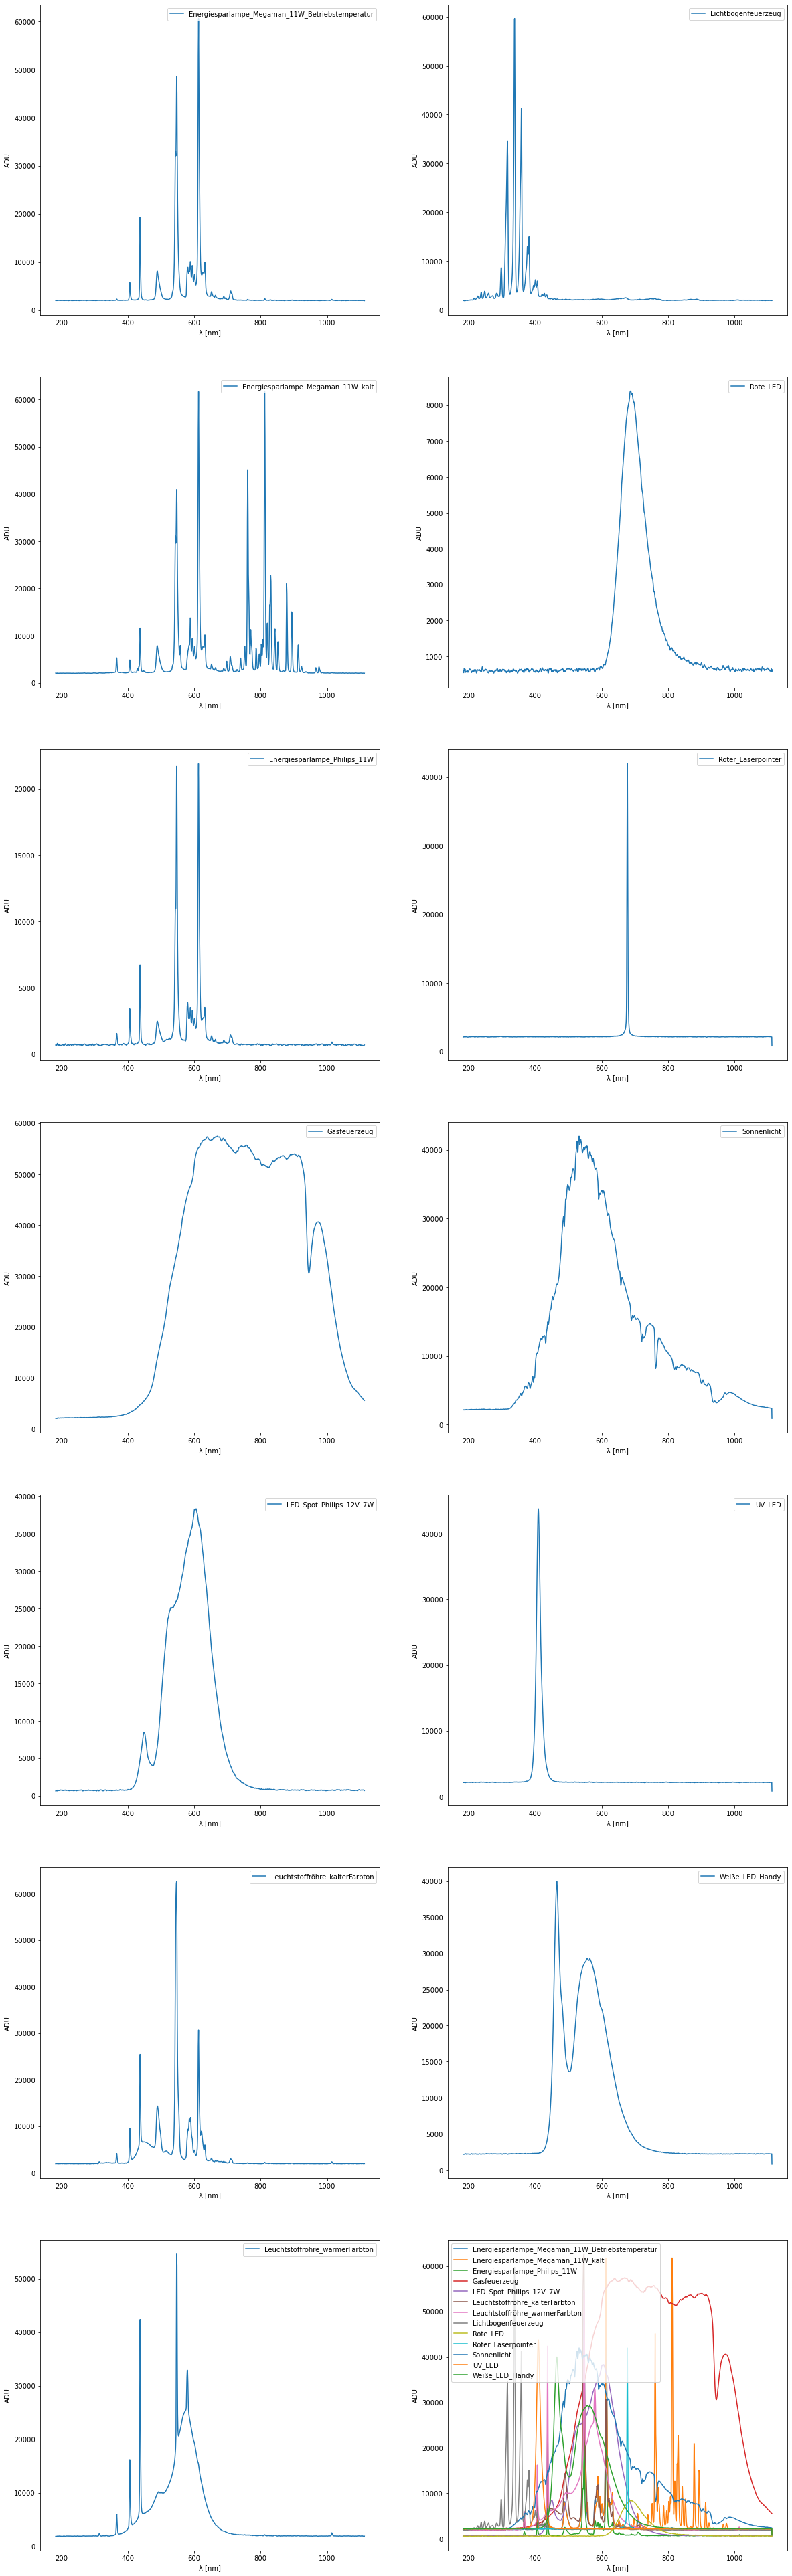

In [7]:
quelle=glob.glob("SpektrenHandout/Lichtquellen/*.SSM")
quelle.sort()
rows = len(quelle)//2+1
fig, ax = plt.subplots(nrows=rows, ncols=2)
fig.set_size_inches(10*2, rows*10)

for i, f in enumerate(quelle):
    spektrum = np.loadtxt(f, skiprows=2, encoding='latin1')
    ax[i%rows][i//rows].plot(spektrum[:,0], spektrum[:,1], label=f.split("/")[-1].split(".")[0])
    ax[rows-1][1].plot(spektrum[:,0], spektrum[:,1], label=f.split("/")[-1].split(".")[0])
    ax[i%rows][i//rows].set_xlabel("\u03bb [nm]")
    ax[i%rows][i//rows].set_ylabel("ADU")
    ax[i%rows][i//rows].legend()

ax[rows-1][1].set_xlabel("\u03bb [nm]")
ax[rows-1][1].set_ylabel("ADU")
ax[rows-1][1].legend()
plt.show()

## Aufgabe 3

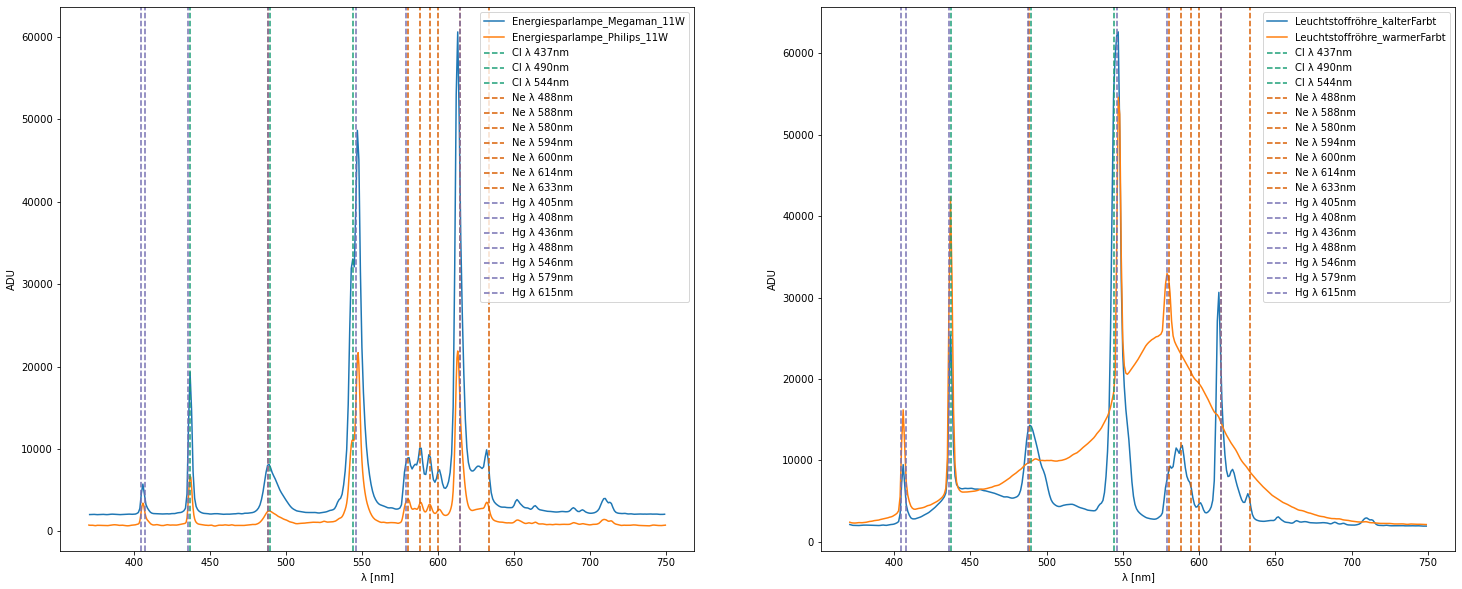

In [8]:
quelle=glob.glob("SpektrenHandout/Lichtquellen/*.SSM")
quelle.sort()

fig, ax = plt.subplots(ncols=2)
fig.set_size_inches(10*2.5, 10)

filter = ["Energiesparlampe", "Leuchtstoff"]

for i, f in enumerate(quelle):
    if any(x in f for x in filter) and "kalt." not in f:
        spektrum = np.loadtxt(f, skiprows=2, encoding='latin1')
        spektrum = spektrum[spektrum[:,0]>370,:]
        spektrum = spektrum[spektrum[:,0]<750,:]
        
        ax[0 if filter[0] in f else 1].plot(spektrum[:,0], spektrum[:,1], label=f.split("/")[-1].split(".")[0][:28])
        ax[0 if filter[0] in f else 1].set_xlabel("\u03bb [nm]")
        ax[0 if filter[0] in f else 1].set_ylabel("ADU")

elements=(
          ((437.3, "Cl"), (489.8, "Cl"), (544.3, "Cl")),
          ((488.5, "Ne"), (588.2, "Ne"), (580.4, "Ne"), (594.5, "Ne"), (600.1, "Ne"), (614.3, "Ne"), (633.4, "Ne"), ),
          ((404.7, "Hg"), (407.7, "Hg"), (435.8, "Hg"), (488, "Hg"), (546, "Hg"), (579, "Hg"), (614.6, "Hg"),),
          )
for a in ax:
    for i,e in enumerate(elements):
        for l, n in e:
            a.axvline(l, c=plt.get_cmap("Dark2")(i), ls="--", label="{} \u03bb {:.0f}nm".format(n, l))

    a.legend()

plt.show()

https://physics.nist.gov/PhysRefData/ASD/Html/verhist.shtml

passende linien fuer bei raumtemp gasfoerminge elemente und quecksilber  
nur konfiguration, keine spin kopplung (J) beruecksichtigt, wenn da mehrere moeglich, dann passenden ausgewaehlt

|$\lambda$ nm|Element|Unteres Level (Konf.)      |Oberes Level (Konf.)| Rel. Intensitaet |
|------------|-------|---------------------------|--------------------|------------------|
|437.293     | Cl II | -                         | -                         | 5000   |
|489.677     | Cl II | $3s^23p^3(^2D^0)4s$       |$3s^23p^3(^2D^0)4p$        | 81000  |
|490.478     | Cl II | $3s^23p^3(^2D^0)4s$       |$3s^23p^3(^2D^0)4p$        | 47000  |
|491.773     | Cl II | $3s^23p^3(^2D^0)4s$       |$3s^23p^3(^2D^0)4p$        | 26000  |
|544.337     | Cl II | $3s^23p^3(^4S^0)3d$       |$3s^23p^3(^4S^0)4p$        | 19000  |
|544.421     | Cl II | $3s^23p^3(^4S^0)3d$       |$3s^23p^3(^4S^0)4p$        | 19000  |
|488.491     | Ne I  | $2s^22p^5(^2P^0_{3/2})3p$ | $2s^22p^5(^2P^0_{1/2})5d$ | 10000  |
|580.445     | Ne I  | $2s^22p^5(^2P^0_{3/2})3p$ | $2s^22p^5(^2P^0_{3/2})4d$ | 5000   |
|588.189     | Ne I  | $2s^22p^5(^2P^0_{3/2})3s$ | $2s^22p^5(^2P^0_{1/2})3p$ | 10000  |
|594.483     | Ne I  | $2s^22p^5(^2P^0_{3/2})3s$ | $2s^22p^5(^2P^0_{1/2})3p$ | 5000   |
|600.093     | Ne I  | $2s^22p^5(^2P^0_{3/2})3p$ | $2s^22p^5(^2P^0_{3/2})4d$ | 1000   |
|614.306     | Ne I  | $2s^22p^5(^2P^0_{3/2})3s$ | $2s^22p^5(^2P^0_{3/2})3p$ | 10000  |
|633.442     | Ne I  | $2s^22p^5(^2P^0_{3/2})3s$ | $2s^22p^5(^2P^0_{3/2})3p$ | 10000  |
|404.657     | Hg I  | $5d^{10}6s6p$             | $5d^{10}6s7s$             | 12000  |
|407.784     | Hg I  | $5d^{10}6s6p$             | $5d^{10}6s7s$             | 1000   |
|435.834     | Hg I  | $5d^{10}6s6p$             | $5d^{10}6s7s$             | 12000  | 
|488.033     | Hg II | -                         | -                         | -      |
|546.075     | Hg I  | $5d^{10}6s6p$             | $5d^{10}6s7s$             | 6000   |
|579.067     | Hg I  |  $5d^{10}6s6p$            | $5d^{10}6s6d$             | 900    |
|614.948     | Hg II | $5d^{10}7s$               | $5d^{10}7p$               |25000000|

## Aufgabe 4

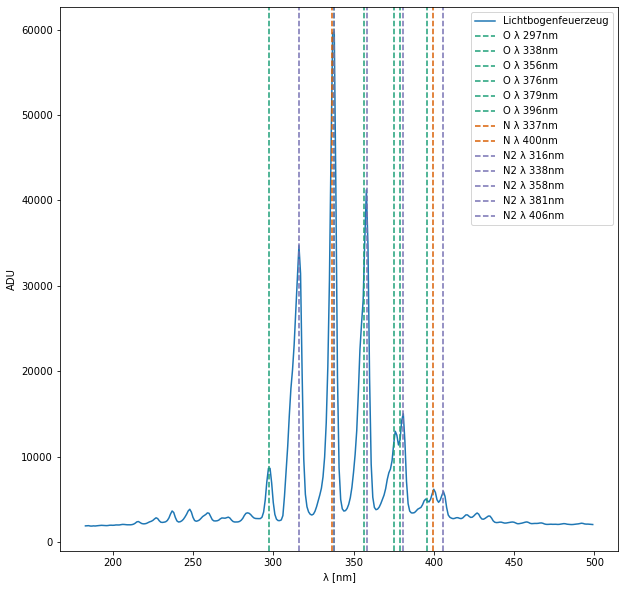

In [9]:
quelle=glob.glob("SpektrenHandout/Lichtquellen/*.SSM")
quelle.sort()

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

filter = ["Lichtbogen"]

for i, f in enumerate(quelle):
    if any(x in f for x in filter):
        spektrum = np.loadtxt(f, skiprows=2, encoding='latin1')
        spektrum = spektrum[spektrum[:,0]<500,:]
        
        ax.plot(spektrum[:,0], spektrum[:,1], label=f.split("/")[-1].split(".")[0])
        
        ax.set_xlabel("\u03bb [nm]")
        ax.set_ylabel("ADU")
        ax.legend()

elements=(
          ((297.2, "O"), (338, "O"), (356.3, "O"), (375.5, "O"), (379, "O"), (396, "O")),
          ((336.7, "N"), (399.5, "N") ),
          ((315.9,"N2"), (337.9, "N2"), (358.2, "N2"), (380.7, "N2"), (406, "N2")),
          )
for i,e in enumerate(elements):
    for l, n in e:
        ax.axvline(l, c=plt.get_cmap("Dark2")(i), ls="--", label="{} \u03bb {:.0f}nm".format(n, l))

ax.legend()

plt.show()

https://physics.nist.gov/PhysRefData/ASD/Html/verhist.shtml

passende linien fuer bestandteile der luft  
nur konfiguration, keine spin kopplung (J) beruecksichtigt, wenn da mehrere moeglich, dann passenden ausgewaehlt

|$\lambda$ nm|Element|Unteres Level (Konf.) |Oberes Level (Konf.)| Rel. Intensitaet |
|------------|-------|----------------------|--------------------|------------------|
|297.229     |O I    | $2s^22p^4$           |  $2s^22p^4$        |   265            |
|338.120     |O IV   | $2s2p(^3P^0)3s$      | $2s2p(^3P^0)3p$    |  360             |
|356.333     |O IV   | $2s2p(^3P^0)3p$      | $2s2p(^3P^0)3d$    | 270              |
|375.467     |O IV   | $2s^22p(^2P^0)3s$    | $2s^22p(^2P^0)3p$  | 150              |
|379.126     |O IV   | $2s^22p(^2P^0)3s$    | $2s^22p(^2P^0)3p$  | 110              |
|396.159     |O IV   | $2s^22p(^2P^0)3p$    | $2s^22p(^2P^0)3d$  | 200              |
|336.734     |N III  | $2s2p(^3P^0)3s$      | $2s2p(^3P^0)3p$    | 120              |
|399.5       |N II   | $2s^22p3s$           | $2s^22p3p$         | 1000             |

Vibrationsuebergaenge fuer N2 nach:  
https://doi.org/10.1063/1.555546  und  
https://doi.org/10.1119/1.4722793  

$N_2~~C^3\Pi_u \rightarrow B^3\Pi_g$
                
|$\lambda$ nm| $\nu'$ --> $\nu''$ |
|------------|--------------------|
|315.9       | 1 --> 0            |
|337.9       | 0 --> 0            |
|358.2       | 0 --> 1            |
|380.7       | 0 --> 2            |
|406.0       | 0 --> 3            |